### IMPORT libraries;

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split 


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.svm import SVR 

from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from keras.layers import Dense, LSTM


import warnings
warnings.filterwarnings("ignore")

### READ DATA 

In [2]:
df=pd.read_csv("C:/Users/eng_a/Downloads/AAPL.csv")

### DATA EXPLORATION 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [5]:
df.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
173,1981-08-20,0.09654,0.097098,0.09654,0.09654,0.075352,17113600


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [7]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [8]:
df.duplicated().any()

False

In [9]:
df.shape

(10468, 7)

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['Date']

0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10463   2022-06-13
10464   2022-06-14
10465   2022-06-15
10466   2022-06-16
10467   2022-06-17
Name: Date, Length: 10468, dtype: datetime64[ns]

### DATA VISULIZATION

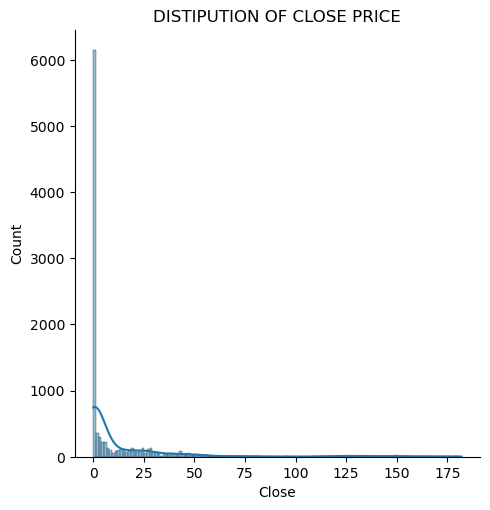

In [15]:
sns.displot(data=df,x='Close',kde=True)
plt.title("DISTIPUTION OF CLOSE PRICE")
plt.show()

Text(0.5, 1.0, 'PAIRPLOT FOR DATA ')

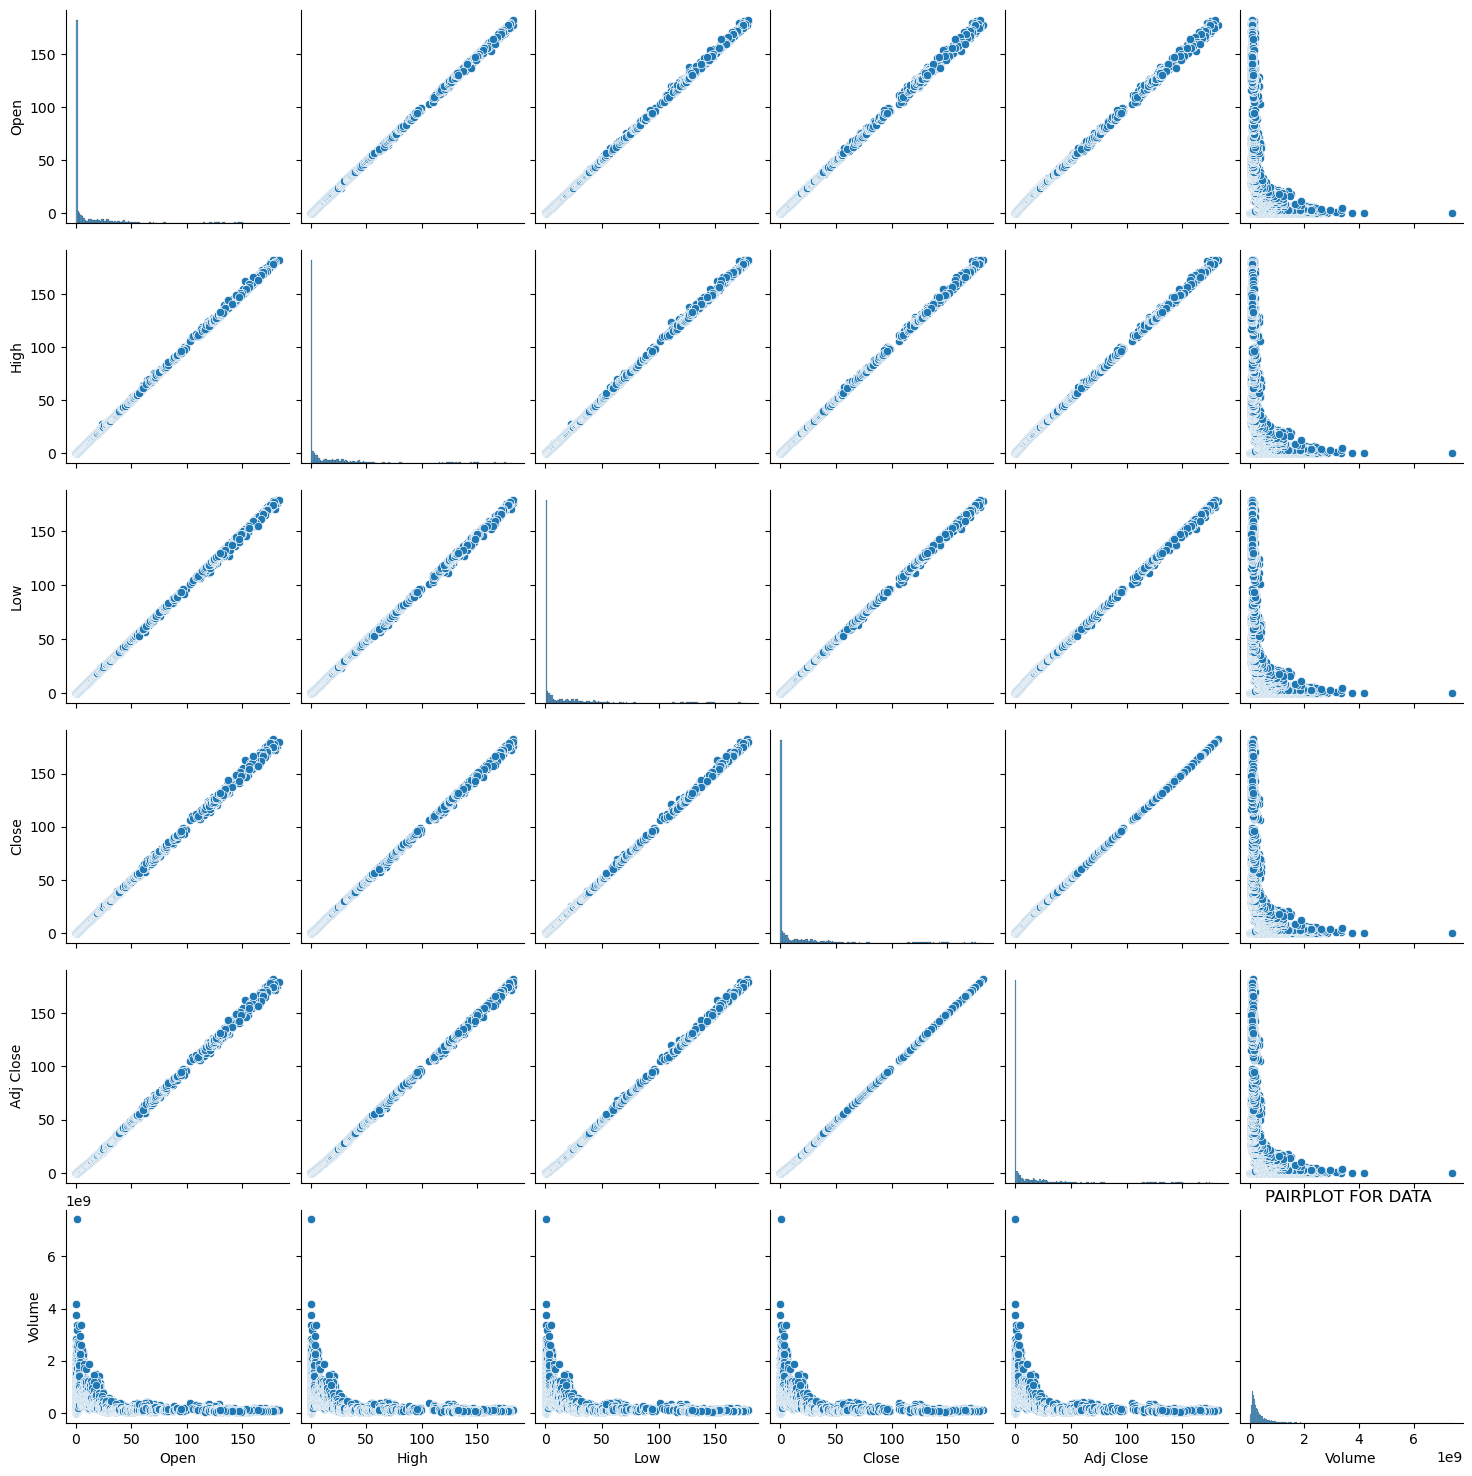

In [16]:
sns.pairplot(df)
plt.title("PAIRPLOT FOR DATA ")

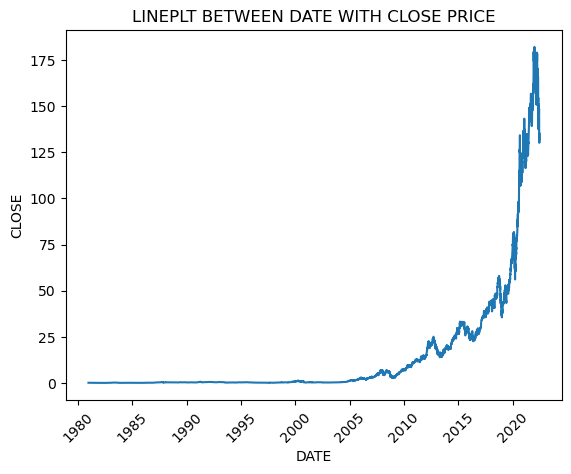

In [17]:
sns.lineplot(data=df,x='Date',y='Close')
plt.title("LINEPLT BETWEEN DATE WITH CLOSE PRICE")
plt.xlabel("DATE")
plt.ylabel("CLOSE")
plt.xticks(rotation=45)
plt.show()

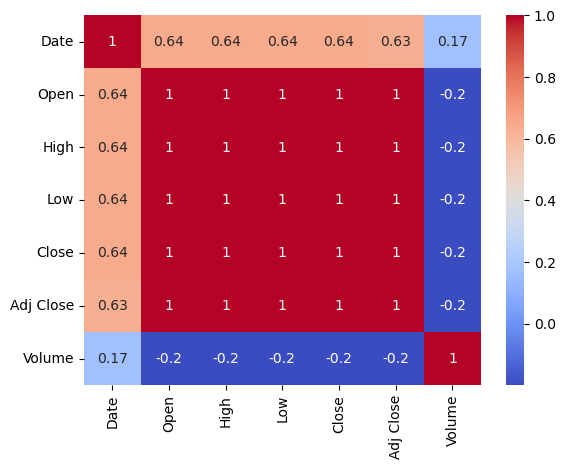

In [18]:
corr=df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

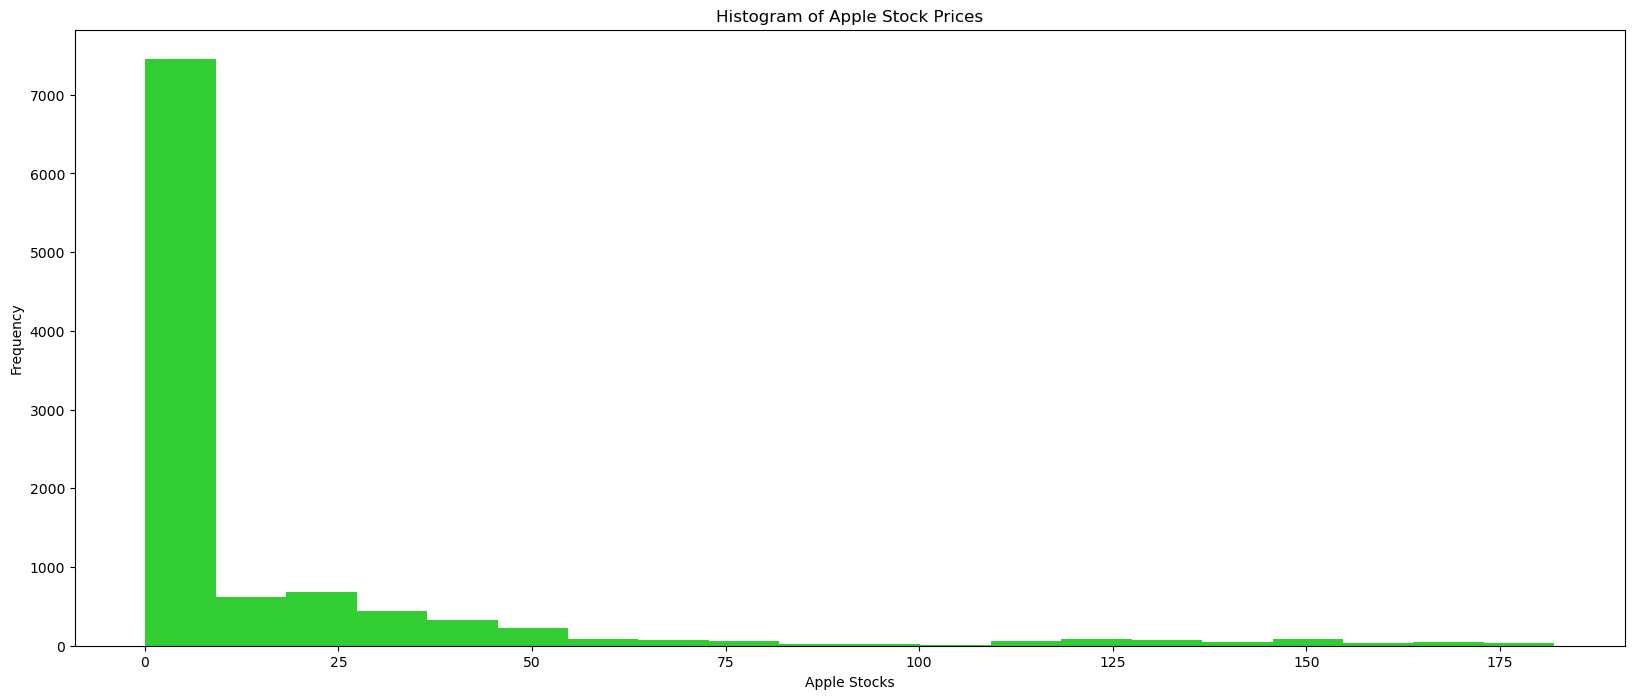

In [19]:
# Plotting Histogram
plt.figure(figsize=(20, 8))
plt.hist(df['Close'], bins=20, color='LimeGreen')
plt.title('Histogram of Apple Stock Prices')
plt.xlabel('Apple Stocks')
plt.ylabel('Frequency')
plt.show()

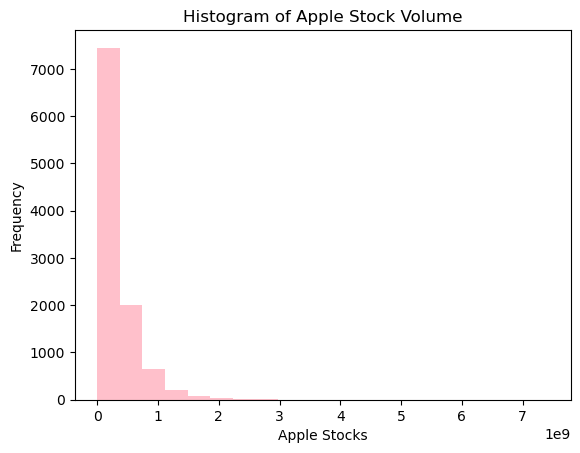

In [22]:
plt.hist(df['Volume'],bins=20, color='pink')
plt.title('Histogram of Apple Stock Volume');
plt.xlabel('Apple Stocks');
plt.ylabel('Frequency');

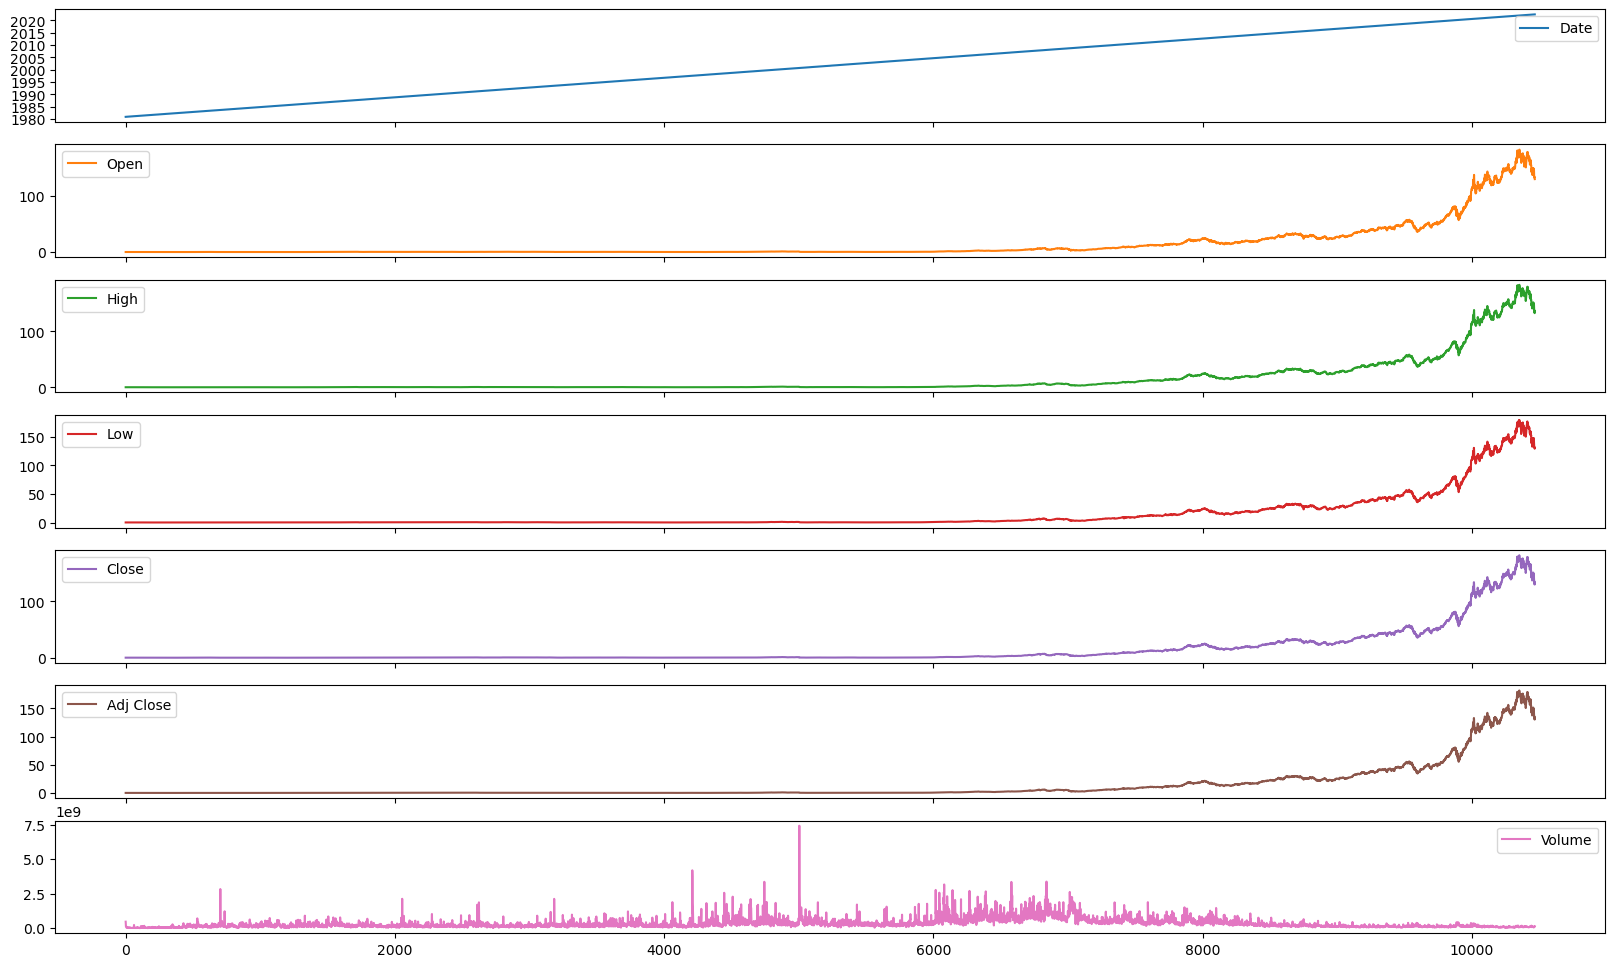

In [27]:
df.plot(subplots=True, figsize=(20, 12))
plt.show()

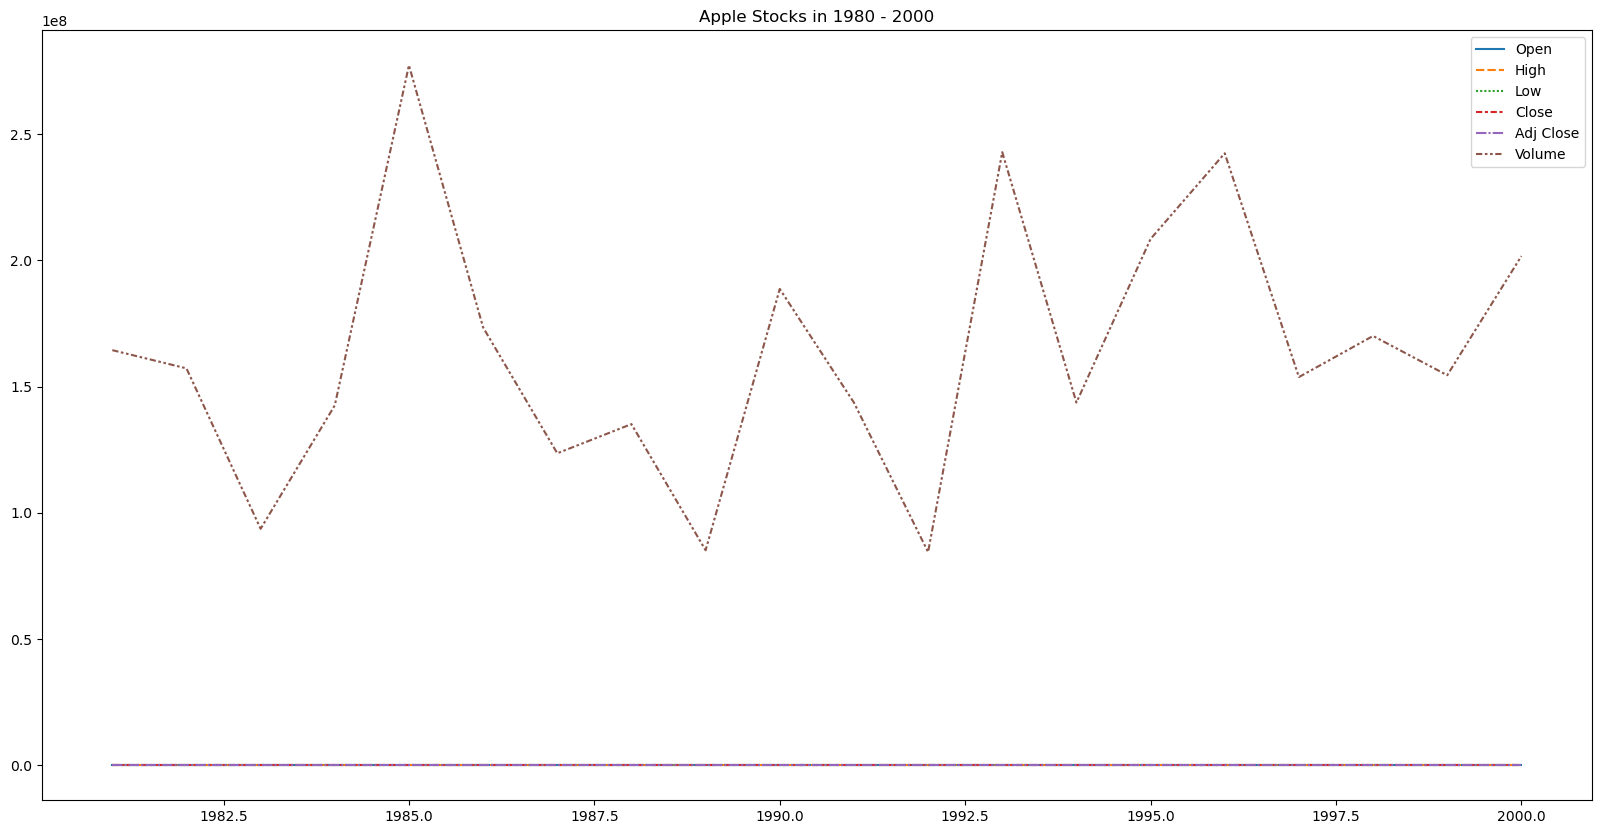

In [28]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df.loc['1980-12-12':'2000-12-31'])
plt.title('Apple Stocks in 1980 - 2000')
plt.show()

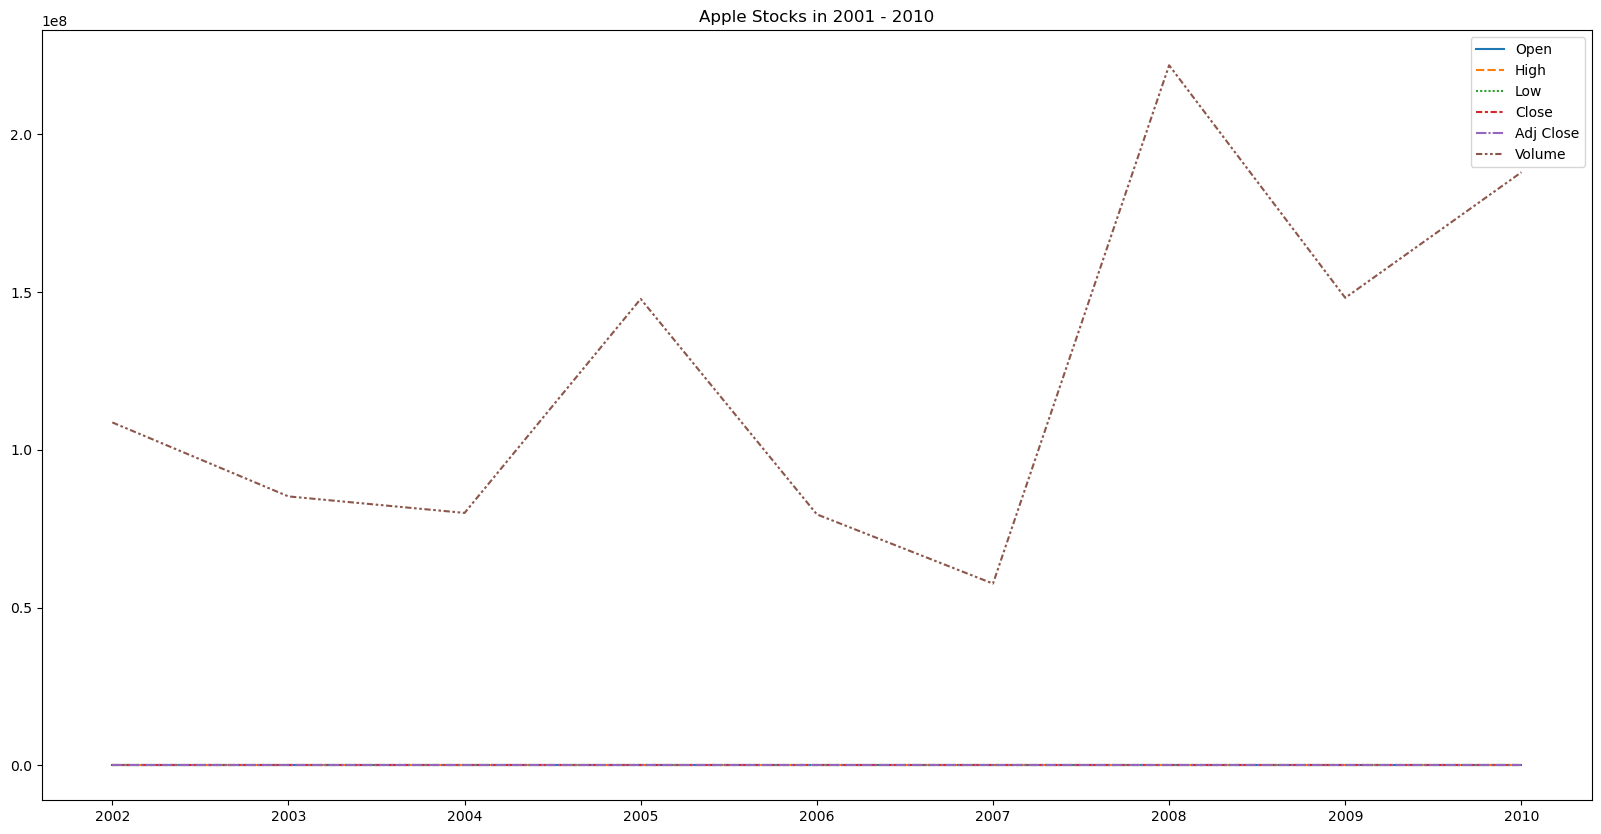

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df.loc['2001-01-01':'2010-12-31'])
plt.title('Apple Stocks in 2001 - 2010')
plt.show()

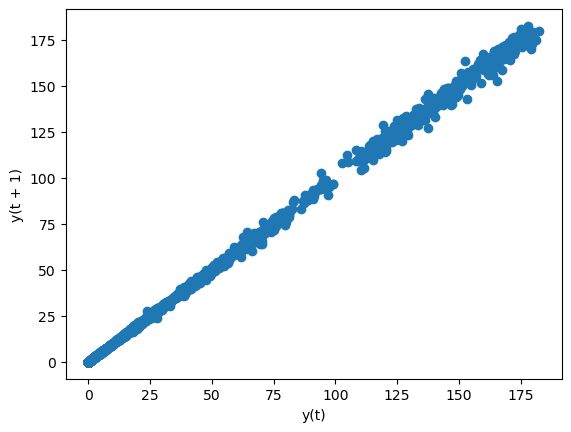

In [30]:
pd.plotting.lag_plot(df['Open'])
plt.show()

### DATA PREPROCESSING:

In [31]:
x=df[['Open', 'High', 'Low', 'Volume']]
y=df['Close']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True,random_state=42,test_size=.3
                                              )

In [33]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### LINEAR REGRESSION MODEL 

In [34]:
lr_model=LinearRegression()

In [35]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred=lr_model.predict(x_test)
y_pred

array([11.40827401,  0.32739665,  0.35954263, ..., 46.94590781,
        0.0595143 , 18.93968656])

In [37]:
lr_mse=mean_squared_error(y_test,y_pred)
lr_smse=np.sqrt(lr_mse)
lr_mae=mean_absolute_error(y_test,y_pred)
lr_r2=r2_score(y_test,y_pred)


print('Linear Regression Model:')
print(f'MSE: {lr_mse:.2f}')
print(f'RMSE: {lr_smse:.2f}')
print(f'MAE: {lr_mae:.2f}')
print(f'R2 Score: {lr_r2:.2f}\n')

Linear Regression Model:
MSE: 0.05
RMSE: 0.23
MAE: 0.06
R2 Score: 1.00



### RANDOM FOREST REGRESSION MODEL

In [38]:
rfr_model=RandomForestRegressor(n_estimators=99,random_state=42)
rfr_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=99, random_state=42)

In [39]:
y_pred =rfr_model.predict(x_test)
y_pred 

array([11.51774886,  0.32406451,  0.358176  , ..., 46.72805577,
        0.05815432, 18.94926434])

In [40]:
lr_mse=mean_squared_error(y_test,y_pred)
lr_smse=np.sqrt(lr_mse)
lr_mae=mean_absolute_error(y_test,y_pred)
lr_r2=r2_score(y_test,y_pred)


print('Linear Regression Model:')
print(f'MSE: {lr_mse:.2f}')
print(f'RMSE: {lr_smse:.2f}')
print(f'MAE: {lr_mae:.2f}')
print(f'R2 Score: {lr_r2:.2f}\n')

Linear Regression Model:
MSE: 0.12
RMSE: 0.35
MAE: 0.10
R2 Score: 1.00



### THANKS FOR VISITING 
### ENG: Ahmed raft mahmoud 